In [1]:
"""

Author: Camila Losada
"""

'\n\nAuthor: Camila Losada\n'

## Example on how to use BhvData structure

In [2]:
# Import libraries
from compdec_v4pfclip_01.utils.structures.bhv_data import BhvData
from compdec_v4pfclip_01.utils import config_task
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import platform
import glob

In [ ]:
if platform.system() == 'Linux':
    basepath = '...'
elif platform.system() == 'Windows':
    basepath = '...'

In [1]:
subpath = f'/session_struct/bhv'
path_list = glob.glob(f'{basepath}{subpath}/*')

NameError: name 'glob' is not defined

In [5]:
filepath = "/2022-11-22_10-59-03_Riesling_e1_r1_bhv.h5" 
bhv = BhvData.from_python_hdf5(f'{basepath}{subpath}{filepath}') # read bhv data
#bhv = BhvData.from_python_hdf5(path_list[0])

In [6]:
bhv.__dict__.keys()

dict_keys(['block', 'code_numbers', 'code_times', 'condition', 'eye_ml', 'fix_fp_t_time', 'fix_fp_post_t_time', 'fix_fp_pre_t_time', 'fix_close', 'fix_far', 'iti', 'stim_match', 'pos_code', 'position', 'reward_plus', 'test_distractor', 'test_stimuli', 'sample_id', 'stim_total', 'trial_error', 'closeexc', 'delay_time', 'excentricity', 'farexc', 'fix_post_sacc_blank', 'fix_time', 'fix_window_radius', 'idletime3', 'max_reaction_time', 'rand_delay_time', 'reward_dur', 'sample_time', 'stay_time', 'test_time', 'wait_for_fix', 'date_time', 'subject', 'experiment', 'recording', 'code_samples', 'end_trials', 'start_trials'])

In [7]:
# General information about the session
print(f'subject: {bhv.subject}')
print(f'date_time: {bhv.date_time}')

subject: Riesling
date_time: 2022-11-22_10-59-03


In [8]:
# Behavioural information
print(f'block: {bhv.block}')
mask_b1 = bhv.block==1 # DMTS
mask_b2 = bhv.block==2 # Saccade
print(f'Number of trials: {len(bhv.block)}')
print(f'Number of trials in block 1: {np.sum(mask_b1)}')
print(f'Number of trials in block 2: {np.sum(mask_b2)}')
## Check number of correct trials (error = 0)
mask_err0 = bhv.trial_error==0
print(f'Number of correct trials: {np.sum(mask_err0)}')
print(f'Number of correct trials in block 1: {np.sum(np.logical_and(mask_err0,mask_b1))}')
print(f'Number of correct trials in block 2: {np.sum(np.logical_and(mask_err0,mask_b2))}')

block: [2 2 2 ... 1 1 1]
Number of trials: 1412
Number of trials in block 1: 1308
Number of trials in block 2: 104
Number of correct trials: 654
Number of correct trials in block 1: 574
Number of correct trials in block 2: 80


In [9]:
ntr = 5
## Block 2: saccade
print(f'possible samples: {np.unique(bhv.sample_id[mask_b2])}')
print(f'possible sample location: {np.unique(bhv.pos_code[mask_b2])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample location {bhv.pos_code[mask_b2].shape}: {bhv.pos_code[mask_b2][:ntr]}')
print(f'events code {bhv.code_numbers[mask_b2].shape}: \n{bhv.code_numbers[mask_b2][:ntr]}')
print(f'events time {bhv.code_samples[mask_b2].shape}: \n{bhv.code_samples[mask_b2][:ntr]}') # All trials are aligned to start trial (code 9)

possible samples: [nan]
possible sample location: [120 121 122 123 124 125 126 127]

information about the first 5 trials:
sample location (104,): [122 121 124 122 126]
events code (104, 20): 
[[  9.  35.   8.  37. 122.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  50.  36.  18.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 124.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 122.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 126.  38.  51.  36.  38.  18.  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]]
events time (104, 20): 
[[ 9707.  9722.  9860. 10216. 10217. 10334. 11346. 11657. 11959. 11969.
  12028. 12233. 12234.    nan    nan    nan    nan    nan    nan    nan]
 [13736. 13746. 13799. 13802. 13816. 13818.    nan    nan    nan    nan
     nan    nan    nan    nan    nan    

In [10]:
## Block 1: DMTS
print(f'possible samples: {np.unique(bhv.sample_id[mask_b1])}')
print(f'possible sample location: {np.unique(bhv.pos_code[mask_b1])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample id {bhv.sample_id[mask_b1].shape}: {bhv.sample_id[mask_b1][:ntr]}')
print(f'test stimuli {bhv.test_stimuli[mask_b1].shape}: \n{bhv.test_stimuli[mask_b1][:ntr]}')
print(f'test distractor {bhv.test_distractor[mask_b1].shape}: \n{bhv.test_distractor[mask_b1][:ntr]}')
print(f'events code {bhv.code_numbers[mask_b1].shape}: \n{bhv.code_numbers[mask_b1][:ntr]}')
print(f'events time {bhv.code_samples[mask_b1].shape}: \n{bhv.code_samples[mask_b1][:ntr]}') # All trials are aligned to 1000 ms before the start of the trial

possible samples: [ 0. 11. 15. 51. 55.]
possible sample location: [-1  1]

information about the first 5 trials:
sample id (1308,): [ 0. 55. 51. 51.  0.]
test stimuli (1308, 5): 
[[52. nan nan nan nan]
 [58. 74. 45. 52. 55.]
 [52. nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
test distractor (1308, 5): 
[[83. nan nan nan nan]
 [88. 22. 11. 63. 76.]
 [66. nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
events code (1308, 20): 
[[ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.  4. 36. 34.
  96. 18.]
 [ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23.  4. 36. 24. 18. nan nan nan nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 97. 36. 18. nan nan nan nan nan nan nan nan nan
  nan nan]]
events time (1308, 20): 
[[396805. 396814. 396820. 396994. 397208. 397667. 398090. 398105. 398114.
  398114. 3

### Evaluate performance in DMTS

In [11]:
trial_errors = bhv.trial_error[mask_b1]
stim_match = bhv.stim_match[mask_b1]
test_stimuli = bhv.test_stimuli[mask_b1]
sample_ids = bhv.sample_id[mask_b1]
print(trial_errors[:5])
print(test_stimuli[:5])
print(sample_ids[:5])

[3 0 3 5 3]
[[52. nan nan nan nan]
 [58. 74. 45. 52. 55.]
 [52. nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
[ 0. 55. 51. 51.  0.]


#### Define a matrix indicating the position of the hits,miss,FA and CR

In [12]:
from compdec_v4pfclip_01.utils.bhv import eval as evalbhv

In [30]:
poscode = 1
masktr = bhv.block==1
trial_errors = bhv.trial_error[masktr]
stim_match   = bhv.stim_match[masktr]
test_stimuli = bhv.test_stimuli[masktr]
sample_id    = bhv.sample_id[masktr]

In [31]:
perf = evalbhv.get_performance(test_stimuli,sample_id, trial_errors)

Text(0.5, 0.98, '2022-11-22_10-59-03')

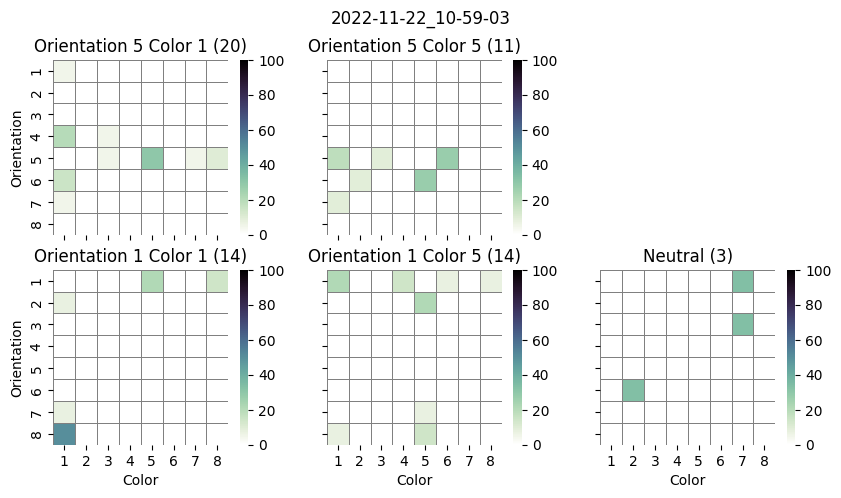

In [33]:
all_errors_counts=np.full((5,8,8),np.nan)
perf = evalbhv.get_performance(test_stimuli,sample_id, trial_errors)
# Check how many trials with FA for each test id
j,i=1,0
fig,ax=plt.subplots(2,3,figsize=(10,5),sharex=True,sharey=True)
for ii, isamp in enumerate([11,15,0,51,55]):
    cond_mask = sample_id==isamp
    fa_rows, fa_cols = np.where(perf == 13)
    # Keep only FA errors occurring during isamp trials.
    valid_fa = cond_mask[fa_rows]
    fa_rows = fa_rows[valid_fa]
    fa_cols = fa_cols[valid_fa]
    # Get current test IDs corresponding to FA errors.
    error_test = test_stimuli[fa_rows, fa_cols]
    # Get all test presented (errors + CR + H)
    all_test_ids = test_stimuli[cond_mask]
    all_test_ids = all_test_ids[~np.isnan(all_test_ids)]
    all_test_id,all_counts = np.unique(all_test_ids,return_counts=True)
    idx = np.array([np.floor(all_test_id/10),all_test_id%10],dtype=np.int8)-1
    all_test_counts=np.zeros((8,8))
    all_test_counts[idx[0],idx[1]]=all_counts

    error_test_id,error_counts = np.unique(error_test,return_counts=True)
    idx = np.array([np.floor(error_test_id/10),error_test_id%10],dtype=np.int8)-1
    error_test_counts=np.zeros((8,8))
    error_test_counts[idx[0],idx[1]]=error_counts
    max_errors=np.sum(error_test_counts)
    sns.heatmap(error_test_counts/max_errors*100,ax=ax[j,i],square=True,vmin=0,vmax=100, cbar_kws={'shrink': 1},cmap=sns.cubehelix_palette(start=.5, rot=-.65, dark=0., light=1, reverse=False, as_cmap=True), linewidths=0.5,linecolor='grey')
    if isamp != 0:
        ax[j,i].set_title(f"Orientation {str(isamp)[0]} Color {str(isamp)[1]} ({int(max_errors)})")
    else:
        ax[j,i].set_title(f"Neutral ({int(max_errors)})")
    ax[j,i].set_xticks(np.arange(8)+0.5,np.arange(1,9))
    ax[j,i].set_yticks(np.arange(8)+0.5,np.arange(1,9))
    if i==0:ax[j,i].set_ylabel("Orientation")
    if j==1:ax[j,i].set_xlabel("Color")   
    i+=1
    if i>2: i,j=0,0
fig.delaxes(ax[0,2])
fig.suptitle(f"{bhv.date_time}")